Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../input/HR_comma_sep.csv")

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##Last Evaluation Analysis


Let's start out by analyzing the evaluation of our employees. I am interested to know how many emploeeys have been evaluated more or less than 0.7. Here is a histogram and density plot of the 'last_evaluation' distribution:

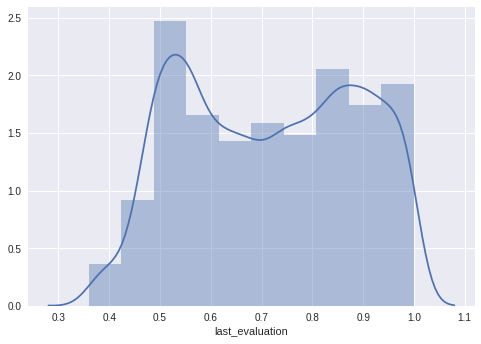

there are 7802 employees evaluated more than 0.7
there are 7197 employees evaluated less than 0.7


In [2]:
f,ax1 = plt.subplots(1,1)
sns.distplot(data['last_evaluation'],bins=10,norm_hist=False)
plt.show()
print('there are {} employees evaluated more than 0.7'.format(len(data[data['last_evaluation']>0.7])))
print('there are {} employees evaluated less than 0.7'.format(len(data[data['last_evaluation']<=0.7])))

We are interested to understand if there is some of the available features which is related to the satisfaction of our best employees. To this end we can plot a heatmap showing the correlation values of each pair of features.

As depicted in the following figure there is a correation with the 'left' property and 'satisfaction_level' whichproves us the assumption that the employees who left the company had low levels of satisfaction.
However if we look at the satisfaction_level we see this feature does not show a strong correlation with other features (but left).

So at now we know unsatisfied employees leave but we do not know what causes low satisfaction.

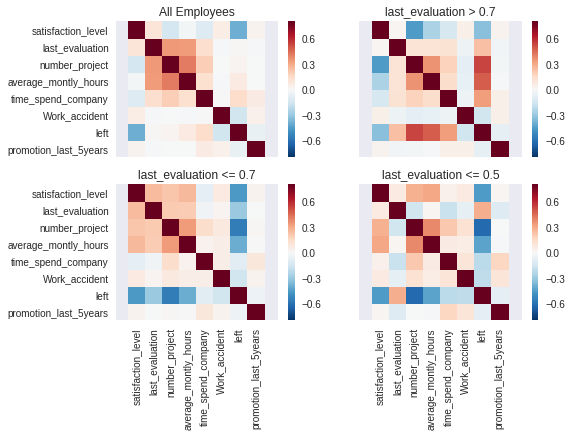

In [3]:

corrmat = data.corr()
f, axarr = plt.subplots(2, 2, sharey=True)


sns.heatmap(corrmat, vmax=.8, square=True,ax=axarr[0,0])
axarr[0,0].set_title("All Employees")
axarr[0,0].xaxis.set_visible(False)

ge = data[data['last_evaluation']>=0.7]
gecorrmat = ge.corr()
axarr[0,1].xaxis.set_visible(False)
axarr[0,1].set_title("last_evaluation > 0.7")
sns.heatmap(gecorrmat, vmax=.8, square=True,ax=axarr[0,1])

be = data[data['last_evaluation']<=0.7]
becorrmat = be.corr()
sns.heatmap(becorrmat, vmax=.8, square=True,ax=axarr[1,0])
axarr[1,0].set_title("last_evaluation <= 0.7")

vbe = data[data['last_evaluation']<=0.5]
vbecorrmat = vbe.corr()
sns.heatmap(vbecorrmat, vmax=.8, square=True,ax=axarr[1,1])
axarr[1,1].set_title("last_evaluation <= 0.5")

plt.show()

 it seems that:

* employees with last_evaluation > 0.7 are more likely to leave if they work on many projects;

* employees with last_evaluation < 0.7 are more likely to leave if they work on few projects

This makes me curious about how projects are distributed among the employees. Let's check it out:

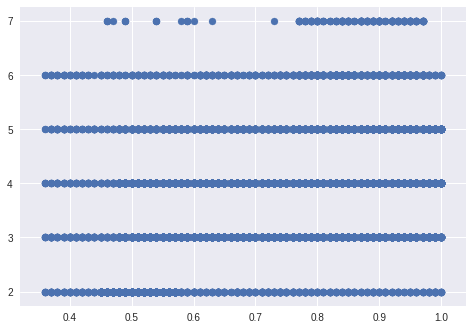

In [4]:
whle_df = data[['last_evaluation','number_project']].copy()
f ,ax1 = plt.subplots(1,1)
ax1.scatter(data['last_evaluation'],data['number_project'])
plt.show()

It sems projects are distributed VERY homogeneously. Too much (in my opinion) to extrat any valuable information.

# Department Analysis

Let's move to departments. How employees are distributed among departments?

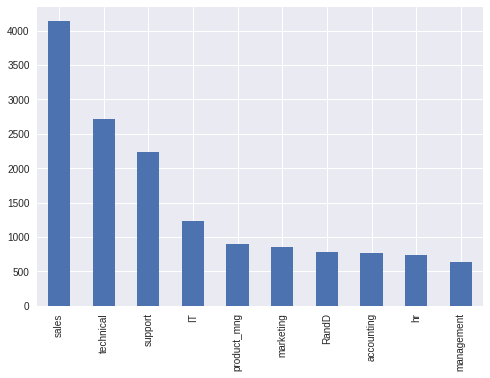

In [5]:
vc = data['sales'].value_counts().plot(kind='bar')
plt.show()

Let's see how projects are distributed among departments

In [6]:
sales = data[data['sales']=='sales']['number_project']
tec = data[data['sales']=='technical']['number_project']
support = data[data['sales']=='support']['number_project']
it = data[data['sales']=='IT']['number_project']
hr = data[data['sales']=='hr']['number_project']
product_mng = data[data['sales']=='product_mng']['number_project']


print('sales mean projects {0} with variance {1}'.format(sales.mean(),sales.std()))
print('technical mean projects {0} with variance {1}'.format(tec.mean(),tec.std()))
print('support mean projects {0} with variance {1}'.format(support.mean(),support.std()))
print('IT mean projects {0} with variance {1}'.format(it.mean(),it.std()))
print('HR mean projects {0} with variance {1}'.format(hr.mean(),hr.std()))   
print('product_mng mean projects {0} with variance {1}'.format(product_mng.mean(),product_mng.std()))  

sales mean projects 3.776328502415459 with variance 1.242798068357808
technical mean projects 3.8779411764705882 with variance 1.2589475967402388
support mean projects 3.803947958725886 with variance 1.2120959150021104
IT mean projects 3.8166259168704157 with variance 1.2216577508086217
HR mean projects 3.654939106901218 with variance 1.2291675815125718
product_mng mean projects 3.8070953436807096 with variance 1.2440466843899665


It seems projects are distributed in almost the same way mong departments (almost the same mean and even almost the same variance). This happens regardless the department. For instance techincal, product_mng, IT and HR shows almost the same mean and variance of projects but I would expect HR to have less projects than the techincal or product MGMT department. This is very strange .

This makes me think evaluations are homogenous  among departments, let's check it  out:

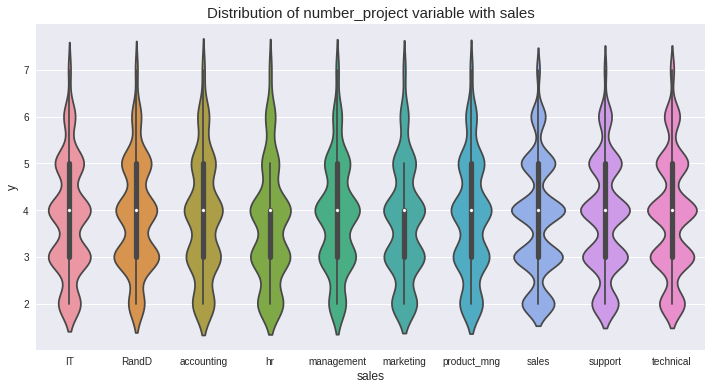

In [7]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='number_project', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of number_project variable with "+var_name, fontsize=15)
plt.show()

In [8]:
sales_eval = data[data['sales']=='sales']['last_evaluation']
tec_eval = data[data['sales']=='technical']['last_evaluation']
support_evl = data[data['sales']=='support']['last_evaluation']
it_eval = data[data['sales']=='IT']['last_evaluation']
hr_eval = data[data['sales']=='hr']['last_evaluation']

print('sales mean evaluation {0} with variance {1}'.format(sales_eval.mean(),sales_eval.std()))
print('technical mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('support mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('it mean evaluation {0} with variance {1}'.format(it_eval.mean(),it_eval.std()))
print('hr mean evaluation {0} with variance {1}'.format(hr_eval.mean(),hr_eval.std()))

sales mean evaluation 0.7097173913043466 with variance 0.17145932860167945
technical mean evaluation 0.7210992647058838 with variance 0.17336427600610105
support mean evaluation 0.7210992647058838 with variance 0.17336427600610105
it mean evaluation 0.716829665851672 with variance 0.16450818342711224
hr mean evaluation 0.7088497970230044 with variance 0.17458398995731736


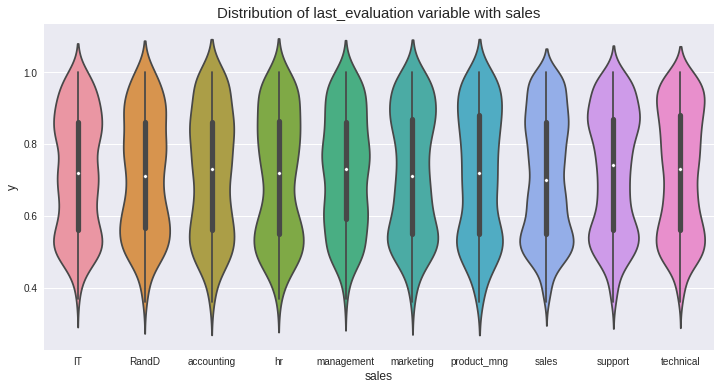

In [9]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='last_evaluation', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of last_evaluation variable with "+var_name, fontsize=15)
plt.show()

Almost the same evaluation mean with almost the same STD. It seems that the department information is basically irrelevant.

In [10]:
sales_eval = data[data['sales']=='sales']['satisfaction_level']
tec_eval = data[data['sales']=='technical']['satisfaction_level']
support_evl = data[data['sales']=='support']['satisfaction_level']
it_eval = data[data['sales']=='IT']['satisfaction_level']
hr_eval = data[data['sales']=='hr']['satisfaction_level']

print('sales mean evaluation {0} with variance {1}'.format(sales_eval.mean(),sales_eval.std()))
print('technical mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('support mean evaluation {0} with variance {1}'.format(tec_eval.mean(),tec_eval.std()))
print('it mean evaluation {0} with variance {1}'.format(it_eval.mean(),it_eval.std()))
print('hr mean evaluation {0} with variance {1}'.format(hr_eval.mean(),hr_eval.std()))

sales mean evaluation 0.614446859903383 with variance 0.25025082044985275
technical mean evaluation 0.6078970588235295 with variance 0.2541932056427754
support mean evaluation 0.6078970588235295 with variance 0.2541932056427754
it mean evaluation 0.6181418092909551 with variance 0.24990302087228874
hr mean evaluation 0.5988092016238159 with variance 0.24792896115563812


The same holds for the satisfaction level

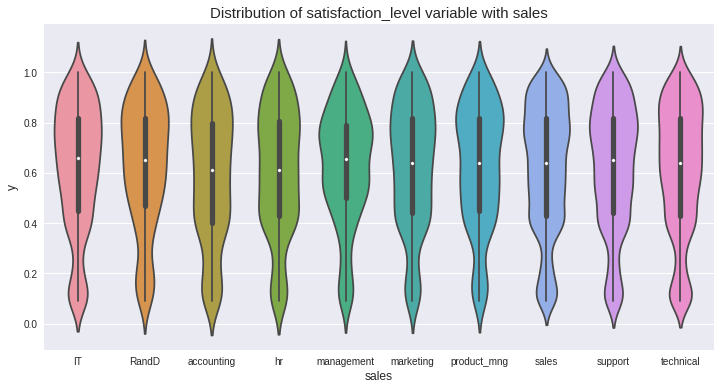

In [11]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='satisfaction_level', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of satisfaction_level variable with "+var_name, fontsize=15)
plt.show()

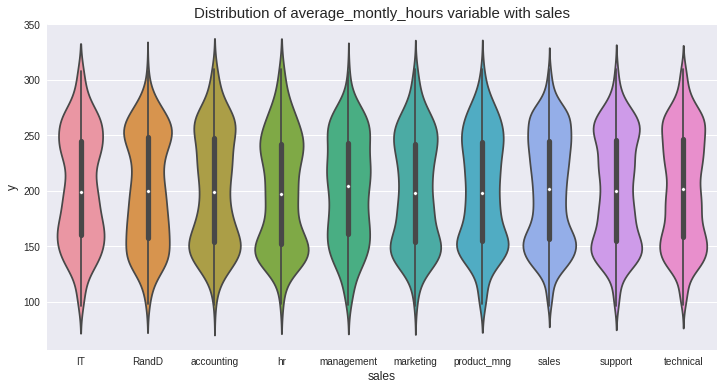

In [12]:
var_name = "sales"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='average_montly_hours', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of average_montly_hours variable with "+var_name, fontsize=15)
plt.show()

## Salary Analysis

Let's now check how salary is related to satisfaction.

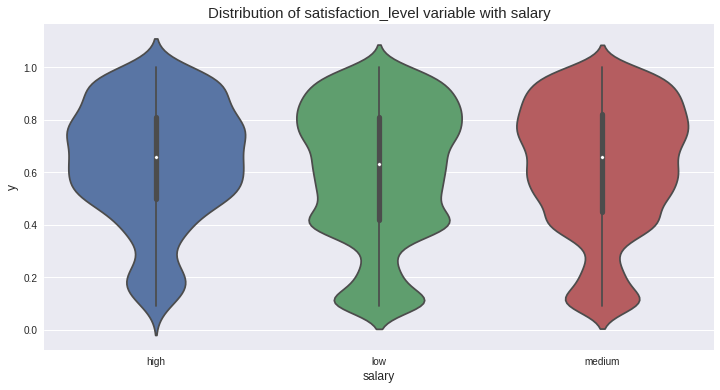

In [13]:
var_name = "salary"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='satisfaction_level', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of satisfaction_level variable with "+var_name, fontsize=15)
plt.show()

According to the chart there is not a strong relationship between salary and satisfaction.

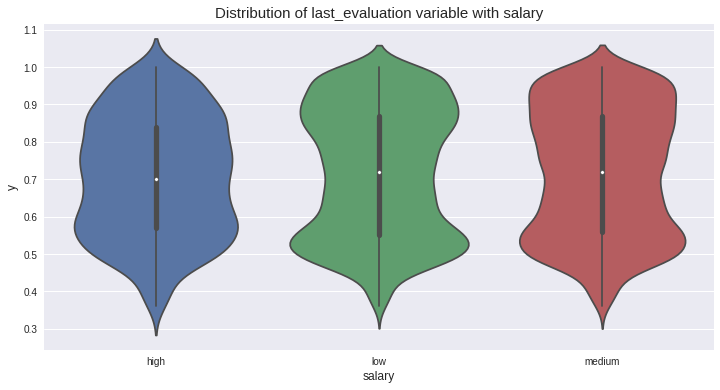

In [14]:
var_name = "salary"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='last_evaluation', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of last_evaluation variable with "+var_name, fontsize=15)
plt.show()

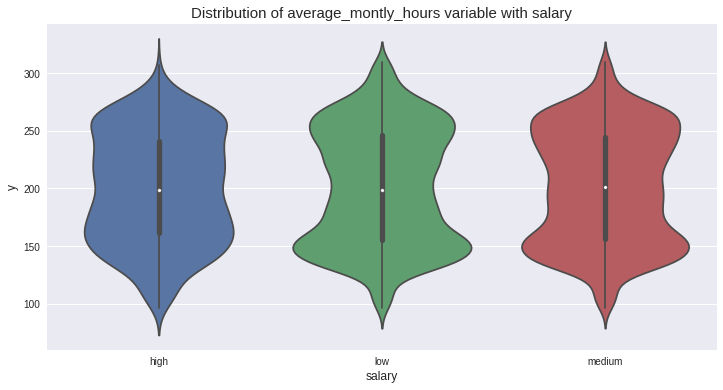

In [15]:

var_name = "salary"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='average_montly_hours', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of average_montly_hours variable with "+var_name, fontsize=15)
plt.show()